In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

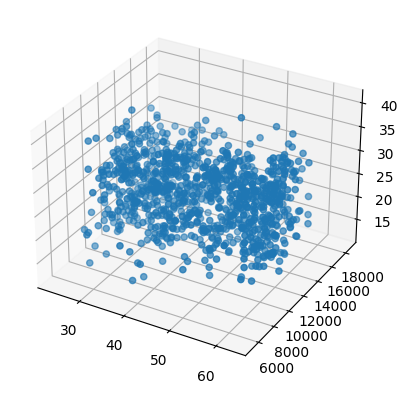

In [3]:
# let's create a new dataset with some fake purchase data

# we will have 3 features
# age
# salary
# number of purchases
import random
data = []
for i in range(1000):
    # this would be random and boring
    # age = random.randint(18, 65)
    # salary = random.randint(10000, 100000)
    # purchases = random.randint(1, 100)
    # data.append([age, salary, purchases])
    # let's make it more interesting
    # let's make the data follow a normal distribution
    age = 18 + random.randint(1,4)*10 + random.gauss(0, 2)
    salary = 10_000 + random.randint(1,3)*1000 + random.gauss(0, 2000)
    purchases = 10 + random.randint(1,2)*10 + random.gauss(0, 3)
    data.append([age, salary, purchases])

# let's plot the data
# we will use a 3d scatter plot
# we will use the first 2 features as x and y
# we will use the third feature as z
# we will use the color to show the value of the third feature

# let's create a 3d plot
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in data], [x[1] for x in data], [x[2] for x in data])
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# TODO get the 3 features into pandas dataframe with correct column names
df = pd.DataFrame(data, columns=['age', 'salary', 'purchases'])
df.head()

,age,salary,purchases
0,49.376406,12698.856288,23.155529
1,57.568192,15617.317093,27.647644
2,60.981484,11358.146952,19.689137
3,51.143271,15851.430070,24.958704
4,28.636215,13855.649840,29.458576


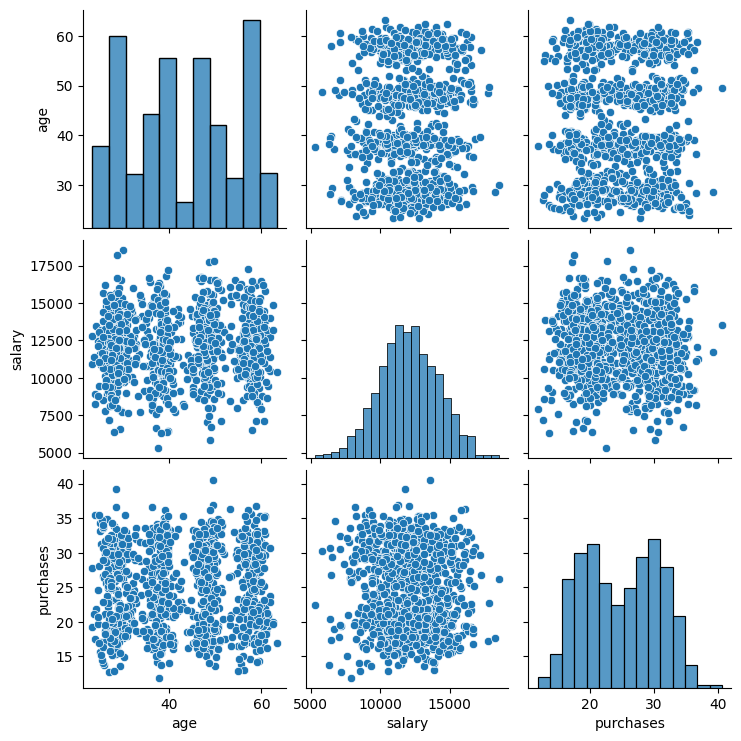

In [6]:
import seaborn as sns
# TODO pairplot
sns.pairplot(df)

In [7]:
df.columns

Index(['age', 'salary', 'purchases'], dtype='object')

In [8]:
features = df[['age', 'salary', 'purchases']].values
features[:5]

array([[   49.37640602, 12698.85628807,    23.15552941],
       [   57.56819191, 15617.31709347,    27.64764436],
       [   60.98148427, 11358.14695226,    19.68913676],
       [   51.14327149, 15851.43006989,    24.95870385],
       [   28.63621517, 13855.64984022,    29.45857609]])

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [10]:
kmeans.fit(features)

KMeans(n_clusters=3, random_state=0)

In [11]:
print(kmeans.labels_)

[2 1 2 1 1 1 2 2 1 2 2 0 2 2 1 1 2 0 2 1 2 2 1 2 1 1 0 2 0 2 2 0 2 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 0 2 1 2 2 2 0 2 2 2 2 2 2 2 0 2
 2 2 0 1 0 2 2 0 0 2 1 1 1 1 2 1 2 2 0 1 1 2 2 2 1 2 1 1 1 0 2 0 2 0 1 0 2
 0 2 2 2 1 2 2 1 0 2 2 2 2 2 2 2 1 0 0 0 0 1 1 1 0 1 1 2 2 0 2 0 2 0 1 2 2
 2 0 2 2 2 2 0 1 2 2 2 1 2 2 1 0 2 0 1 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 0 2 2
 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 1 1 0 1 2 2 1 2 1 0 0 1 2 2 2 2 2 0 1
 0 2 2 0 0 1 2 1 2 0 1 2 1 2 2 1 1 1 2 2 1 2 0 1 2 0 1 2 0 0 2 0 2 1 2 2 2
 0 1 0 1 0 0 2 2 0 1 0 2 2 2 0 2 0 2 0 2 2 1 2 2 2 2 0 1 2 2 1 0 2 2 0 0 0
 2 2 2 0 2 1 1 0 0 1 1 2 0 2 1 1 2 1 0 2 0 2 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1
 2 0 0 1 2 2 0 1 0 2 1 1 1 2 2 2 1 0 0 0 0 0 2 1 0 2 1 0 2 2 2 2 2 1 1 2 1
 0 0 2 1 1 1 1 0 0 2 0 1 2 0 0 1 1 2 1 1 2 2 2 0 2 2 0 2 0 2 2 1 2 2 1 2 2
 0 2 0 2 0 0 2 0 2 1 1 2 1 2 1 1 1 0 2 0 2 2 0 1 0 1 2 2 0 2 1 0 2 2 1 2 0
 1 1 1 0 2 2 0 1 1 1 2 1 2 0 1 0 0 2 2 0 0 0 2 0 2 0 1 1 1 2 1 0 1 0 2 1 0
 2 2 1 2 0 1 1 2 1 1 2 2 

In [12]:
df['my_clusters'] = kmeans.labels_
df.head()

,age,salary,purchases,my_clusters
0,49.376406,12698.856288,23.155529,2
1,57.568192,15617.317093,27.647644,1
2,60.981484,11358.146952,19.689137,2
3,51.143271,15851.430070,24.958704,1
4,28.636215,13855.649840,29.458576,1


In [13]:
print(sum(df['my_clusters'] == kmeans.labels_))

1000


In [14]:
print(sum(df['my_clusters'] == kmeans.labels_) / len(df)) # so roughly 100% accuracy - is it ok? 

1.0


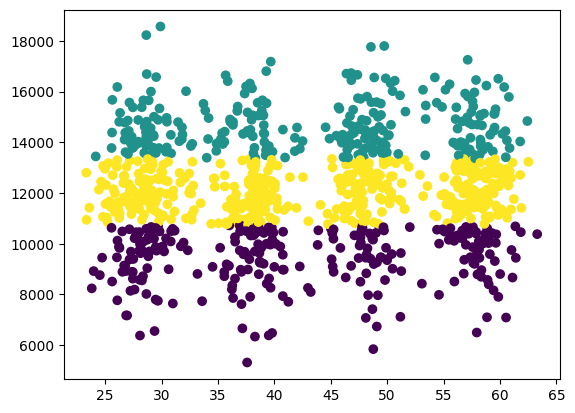

In [15]:
plt.scatter(features[:,0], features[:,1], c=kmeans.labels_)

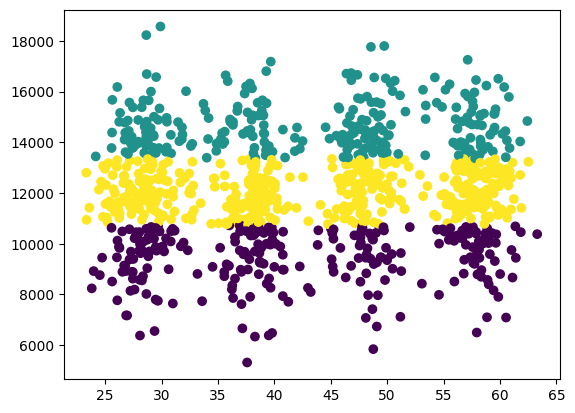

In [16]:
plt.scatter(features[:,0], features[:,1], c=df['my_clusters'])

In [17]:
# lets create kmeans ojbect with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=0)

In [18]:
# now i can fit the model
kmeans_2.fit(features)
# print the labels
print(kmeans_2.labels_)

[0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 1 1 

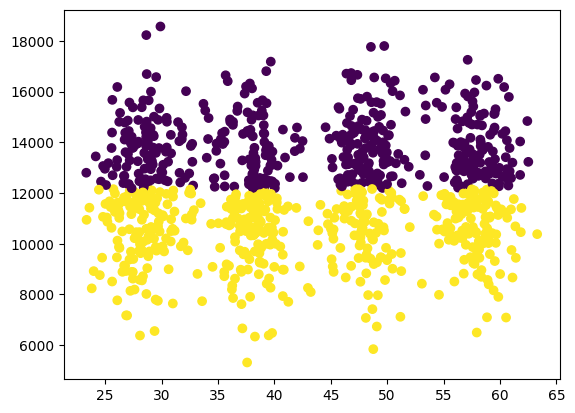

In [19]:
plt.scatter(features[:,0], features[:,1], c=kmeans_2.labels_)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
# we will test kmeans with 2 to 10 clusters and calculate the inertia
inertia = []
MAX_CLUSTERS = 20 + 1
for k in range(2, MAX_CLUSTERS):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    # so we throw away the labels and keep the inertia

# kmeans is fast and we have little data so we can do this
# but in real life some algorithms are slow and we have a lot of data which would make this unfeasible

# plot the inertia values
plt.plot(range(2, MAX_CLUSTERS), inertia, marker='o')

In [ ]:
features2 = df[['age', 'salary']].values
features2[:5]

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans2.fit(features)

In [ ]:
print(kmeans2.labels_)

In [ ]:
print(df['purchases'].values)